# Edge Detection

Edge detection is the process of extracting features by  finding the boundaries of object within images. It is also important in  reducing dimensionality from the images.

Today, I am going explain how edge detection works based on below Images. The images is made with RGB channel.Here, each pixels is divided into three values that are RED, GREEN and BLUE. While doing edge detection, we have to calculate the value of all three colors red, green and blue by multiplying each value of these colors to kernel/filter and add them at the same time. In real life, it is difficult to calculate the three dimension figure with filter however I am going to explain the same figure by converting by converting to grey scale  and do different pixels assumption.   

# <img src='diyo.jpg'>

 The figure which is shown above is going to convert into grey scale and here is my figure.

# <img src="b_W.png">

In above figure, we can see that white and black colors with  different variation like darker,brighter, lighter etc. In image, all four corner have darkers pixels, however, the middle parts have brighter pixels mostly the fire comes out from diya so it has higher value compare to other side parts of images.

Now, Lets find the vertical edge detection of given image 

Suppose, our image has 6*6=36pixels =[[5,3,2,9,0,3]
                                    ,[4,8,9,7,2,6],
                                     [13,4,9,10,12,2]
                                     [3,5,7,9,8,3],
                                     [4,5,6,4,6,8],
                                     [2,7,8,7,9,0]]


lets find the vertical filter of 3*3 pixels=[[1,0,-1],
                                             [1,0,-1,
                                             [1,0,-1]]
                                             
Again, lets use stride=1 for shifting or slding our filter over the image pixels
from our image pixels and filter we can find our that our output pixels should be= n-f-1
                                                                                 
 where, n=pixels size of the image which is 6
        f=filter size which is 3
        ouput=n-f+1
              =6-3+1
              =4 it means our output will be 4*4 pixels
        


Its time to slide our filter on image pixel

# <img src="Written_problems/1.jpg">

In above figure, I have use filter to detect the edge of the image and got the value of  first index as 2.After that I will move my stride by 1 towards right and find the values and of second steps

# <img src='Written_problems/2.jpg'>

Again, In second step I find the value of second index by using stride as 1 thus, shifting the filter towards the right side by taking 1 steps. In this way, I am going to find the feature map of 4*4 by moving the stride by 1 sequentially.

# <img src="Written_problems/3.jpg">

<img src="Written_problems/4.jpg">

<img src="Written_problems/5.jpg">

<img src="Written_problems/6.jpg">

Finally in our feature map we have got 4*4 pixels of 
[[2,-11,6,15],
[-5,-9,3,15],
[-2,-2,-8,10],
[    12,1,-2,9]]

Lets do edge detection using code where I have use one colorful image and 
convert to the black and white color
I have also applied both both horizontal and vertical edge detector to detect
the edge of the image

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

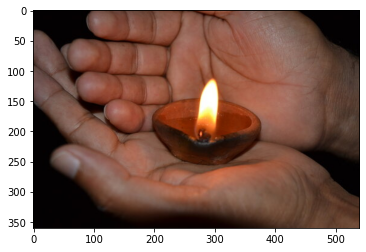

In [264]:
img=plt.imread('diyo.jpg')
plt.imshow(img)

In [265]:
#Another way to convert colorful image to black and white
# from PIL import Image
# grey_img=Image.open('diyo.jpg').convert('LA')
# plt.imshow(grey_img)

In [266]:
# Here I am converting the our image to black and color or convering grey-scale
#image 
grey_img=img.mean(axis=2,keepdims=True)/255.0
grey_img=np.concatenate([grey_img]*3,axis=2)

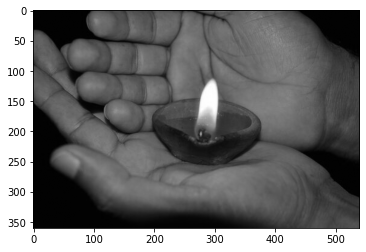

In [267]:
plt.imshow(grey_img)

In [268]:
#Initially we are making our image is fill with zero so when we detect our image
#using vertical and horizontal filter then we fill it with edges
edges_img=np.zeros_like(grey_img)
edges_img.shape

(360, 540, 3)

In [269]:
# initializing both vertical and horizontal filter
vertical_filter=[[1,0,-1],[1,0,-1],[1,0,-1]]
horizontal_filter=[[1,1,1],[0,0,0],[-1,-1,-1]]

In [270]:
# here we are initialising n as row, m as column and d as total
#number of dimension
n,m,d=grey_img.shape

In [271]:
# In this image I am sliding my vertical and horizontal filter over the image
# inorder to detect the edge in our image

for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels=grey_img[row-1:row+2,col-1:col+2,0]
        
        vertical_transformed_pixels=vertical_filter*local_pixels
        vertical_score=vertical_transformed_pixels.sum()/4
        
        horizontal_transformed_pixels=horizontal_filter*local_pixels
        horizontal_score=horizontal_transformed_pixels.sum()/4
        
        edge_score=(vertical_score**2 + horizontal_score**2)**.5
        edges_img[row,col]=[edge_score]*3
edges_img=edges_img/edges_img.max()



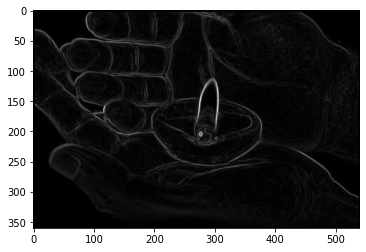

In [272]:
plt.imshow(edges_img)